# Week 4 - Assignment


In [1]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

%matplotlib inline

## Clasification Exercises

1. Load the handwritten digits dataset and choose a metric
2. Divide the data into a training and test dataset
3. Build a RandomForestClassifier on the training dataset, using cross-validation to evaluate performance
4. Choose another classification algorithm and apply it to the handwritten digits dataset. 
5. Use grid search to find the optimal parameters for the chosen algorithm.
6. Comparing the true values with the predictions from the best model identify the numbers that are most commonly confused.

(1797, 64)
(1797,)
MSE: example for digit 0 compared to another example for digit 0 8.78125
MSE: example for digit 0 compared to examle for digit 4 41.328125
0


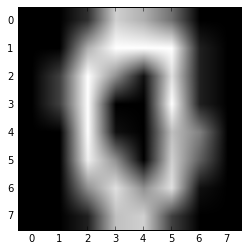

In [9]:
# 1 - Load the handwritten digits dataset and choose an appropriate metric

import sklearn.datasets
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import pairwise_distances

digits = sklearn.datasets.load_digits()

# X - how digits are handwritten
X = digits['data']

# y - what these digits actually are
y = digits['target']

print(X.shape)
print(y.shape)

print("MSE: example for digit 0 compared to another example for digit 0", mean_squared_error(X[0], X[10]))
print("MSE: example for digit 0 compared to examle for digit 4", mean_squared_error(X[0], X[400]))

print(y[10])
plt.imshow(X[20].reshape((8,8)),  cmap=plt.cm.gray)
plt.show()

See http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics for more details.

A balanced F1 score combining precision and recall is a good default performance measure for binary classifiers. However, our problem is multiclass - where we have 10 classes, one for each digit. In extending a binary metric to multiclass or multilabel problems, the data is treated as a collection of binary problems, one for each class.

There are then a number of ways to average binary metric calculations across the set of classes, each of which may be useful in some scenario. Where available, you should select among these using the average parameter.

"macro" simply calculates the mean of the binary metrics, giving equal weight to each class. In problems where infrequent classes are nonetheless important, macro-averaging may be a means of highlighting their performance. On the other hand, the assumption that all classes are equally important is often untrue, such that macro-averaging will over-emphasize the typically low performance on an infrequent class.

Thus if we make sure that each digit is represented by approximately equal number of samples, the performance of a classifier will be best evaluated using F1 with macro averaging across the classes. Stratified Kfold or Stratified train_test_split can be used to make sure each class gets an approximately equal number of samples in a random split.

In [3]:
# 2 - Divide the data into a training and test dataset
from sklearn.model_selection import train_test_split


In [4]:
# 3 - Build a RandomForestClassifier on the training dataset, using cross-validation to evaluate performance

import pandas as pd
from sklearn import ensemble
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score


In [5]:
# 4 - Choose another classification algorithm and apply it to the digits dataset. 

# Let us consider a KNN classifier with 5 nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score


In [6]:
# 5 - Use grid search to find the optimal parameters for the chosen algorithm.
from sklearn.model_selection import GridSearchCV


In [7]:
# 6 - Comparing the true values with the predictions from the best model identify the numbers that are most commonly confused.
from sklearn.metrics import confusion_matrix
